In [1]:
# 导入相应的运算库
import numpy as np
from math import pi
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit import Aer

In [2]:
# 定义相应的量子寄存器，并添加至电路当中去
# q0寄存器表示地址寄存器
q0 = QuantumRegister(5,'q0')
c0 = ClassicalRegister(5,'c0')
# 定义一个量子电路对象
Circuit = QuantumCircuit()
# 往寄存器中添加4个量子寄存器
Circuit.add_register(q0,c0)

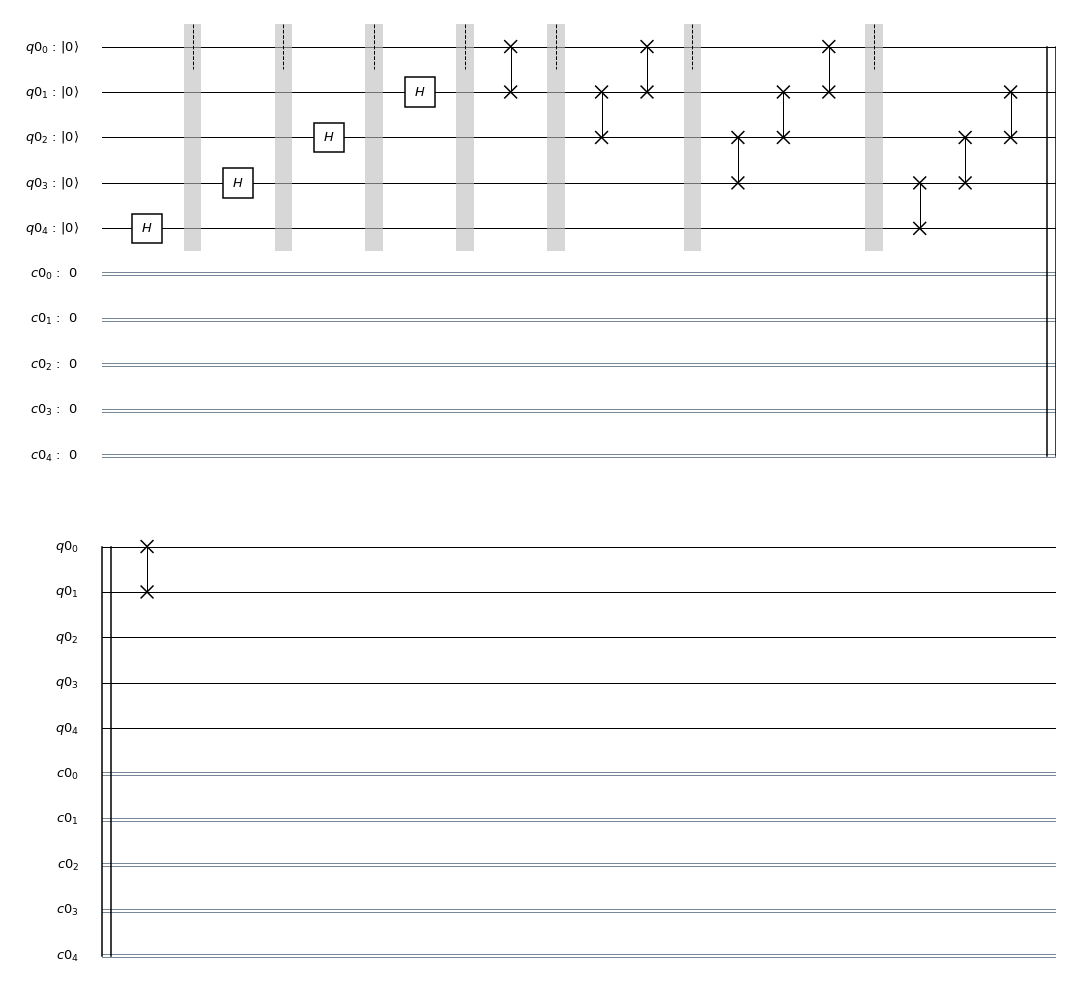

In [3]:
# 添加量子门操作，注意这里的命名方式为最低有效位
# 执行H门操作，将地址寄存器q0张开，分叉存储，由于两个数据只需要用1个量子比特进行表示
Circuit.h(q0[4])
Circuit.barrier()
Circuit.h(q0[3])
Circuit.barrier()
Circuit.h(q0[2])
Circuit.barrier()
Circuit.h(q0[1])
Circuit.barrier()
Circuit.swap(q0[1], q0[0])
Circuit.barrier()
Circuit.swap(q0[2], q0[1])
Circuit.swap(q0[1], q0[0])
Circuit.barrier()
Circuit.swap(q0[3], q0[2])
Circuit.swap(q0[2], q0[1])
Circuit.swap(q0[1], q0[0])
Circuit.barrier()
Circuit.swap(q0[4], q0[3])
Circuit.swap(q0[3], q0[2])
Circuit.swap(q0[2], q0[1])
Circuit.swap(q0[1], q0[0])
# 绘制整个量子电路图
Circuit.draw(output='mpl')

In [4]:
# 在单一模拟器后端运行量子电路
backend = Aer.get_backend('unitary_simulator')
job = execute(Circuit, backend)
result = job.result()
# 显示结果
print(result.get_unitary(Circuit, decimals=3))

[[ 0.25+0.j  0.  +0.j  0.25+0.j ...  0.  +0.j  0.25+0.j  0.  +0.j]
 [ 0.25+0.j  0.  +0.j  0.25+0.j ...  0.  +0.j -0.25+0.j  0.  +0.j]
 [ 0.25+0.j  0.  +0.j  0.25+0.j ...  0.  +0.j -0.25+0.j  0.  +0.j]
 ...
 [ 0.  +0.j  0.25+0.j  0.  +0.j ...  0.25+0.j  0.  +0.j -0.25+0.j]
 [ 0.  +0.j  0.25+0.j  0.  +0.j ...  0.25+0.j  0.  +0.j -0.25+0.j]
 [ 0.  +0.j  0.25+0.j  0.  +0.j ... -0.25+0.j  0.  +0.j  0.25+0.j]]
